<a href="https://colab.research.google.com/github/exactful/convolutional-neural-networks/blob/master/mnist_fashion_classification_keras_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Network for fashion images**

Image classification using a Keras CNN and the MNIST fashion dataset

In [1]:
from sklearn.model_selection import train_test_split

from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(class_names)

In [3]:
# Define image spec
img_rows = 28
img_cols = 28
channels = 1

In [4]:
# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Extract some validation data from the train data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Normalize pixel values to be between 0 and 1
#X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

# One-hot encode the output
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

4422102/4422102 [==============================] - 0s 0us/step


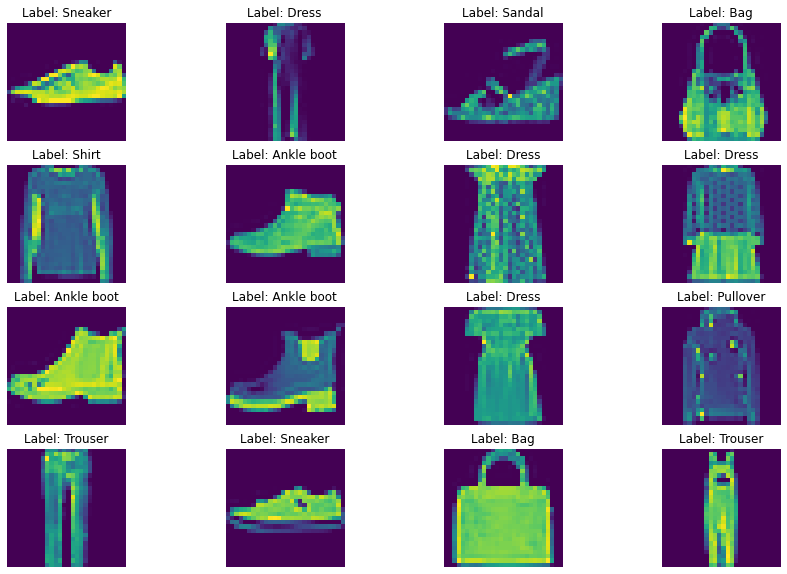

In [5]:
# Display examples
cols, rows = 4, 4
plt.subplots(figsize=(15, 10))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i+1)
  ax.set_axis_off()
  ax.imshow(X_train[i])
  ax.set_title(f"Label: {class_names[np.argmax(y_train[i])]}")

plt.show()

In [6]:
# Shapes
print(f"Train: {X_train.shape}\nValidation: {X_val.shape}\nTest: {X_test.shape}")

Train: (48000, 28, 28)
Validation: (12000, 28, 28)
Test: (10000, 28, 28)


In [7]:
# Define a convolutional model
num_filters = 64
act = "relu"
reg = regularizers.l2(1e-4) # None
drop_conv = 0.4

drop_dense = 0.2
act_dense = "softmax"

opt = Adam()
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=act, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels), padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # Reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # Reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=act, kernel_regularizer=reg, padding="same"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # Reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=act, kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation=act_dense))

model.compile(optimizer=opt, loss=loss, metrics=metrics)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                        

In [8]:
# Fit model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, verbose=True)

Epoch 1/30
1500/1500 [==============================] - 30s 13ms/step - loss: 0.6855 - accuracy: 0.8202 - val_loss: 0.5025 - val_accuracy: 0.8875
Epoch 2/30
1500/1500 [==============================] - 19s 13ms/step - loss: 0.5174 - accuracy: 0.8814 - val_loss: 0.4763 - val_accuracy: 0.8951
Epoch 3/30
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4914 - accuracy: 0.8932 - val_loss: 0.5740 - val_accuracy: 0.8622
Epoch 4/30
1500/1500 [==============================] - 16s 11ms/step - loss: 0.4954 - accuracy: 0.9005 - val_loss: 0.4738 - val_accuracy: 0.9115
Epoch 5/30
1500/1500 [==============================] - 16s 11ms/step - loss: 0.5058 - accuracy: 0.9018 - val_loss: 0.5006 - val_accuracy: 0.9045
Epoch 6/30
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5106 - accuracy: 0.9071 - val_loss: 0.5223 - val_accuracy: 0.9005
Epoch 7/30
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5115 - accuracy: 0.9093 - val_loss: 0.4921 -

In [9]:
def plot_history(hist):

  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
  
  plt.subplots_adjust(hspace = 0.3)

  # Plot loss
  ax1.set_title("Cross Entropy Loss")
  ax1.set_xlabel("Epochs")
  ax1.plot(history.history["loss"], color="blue", label="train")
  ax1.plot(history.history["val_loss"], color="orange", label="test")
  ax1.legend(handles=[mpatches.Patch(color="blue", label='Train'), mpatches.Patch(color="orange", label='Validation')])

  # Plot accuracy
  ax2.set_title("Classification Accuracy")
  ax2.set_xlabel("Epochs")
  ax2.plot(history.history["accuracy"], color="blue")
  ax2.plot(history.history["val_accuracy"], color="orange")
  ax2.legend(handles=[mpatches.Patch(color="blue", label='Train'), mpatches.Patch(color="orange", label='Validation')])

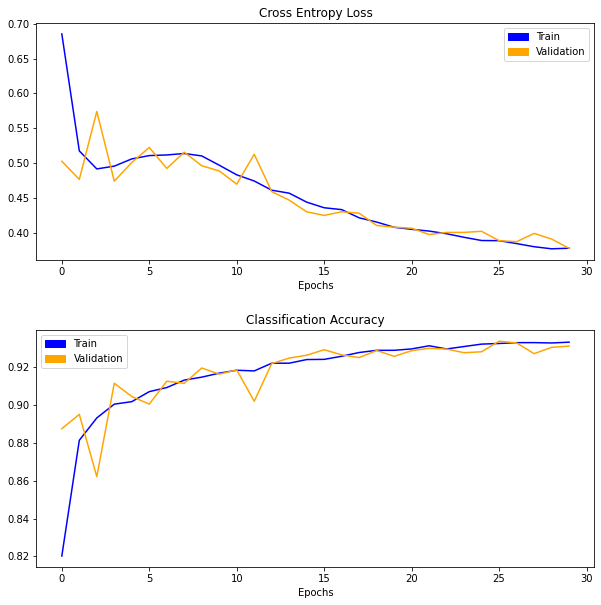

In [10]:
plot_history(history)

In [11]:
# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

313/313 [==============================] - 2s 5ms/step - loss: 0.3890 - accuracy: 0.9284
Accuracy: 92.84


In [12]:
# Get predictions on test data
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


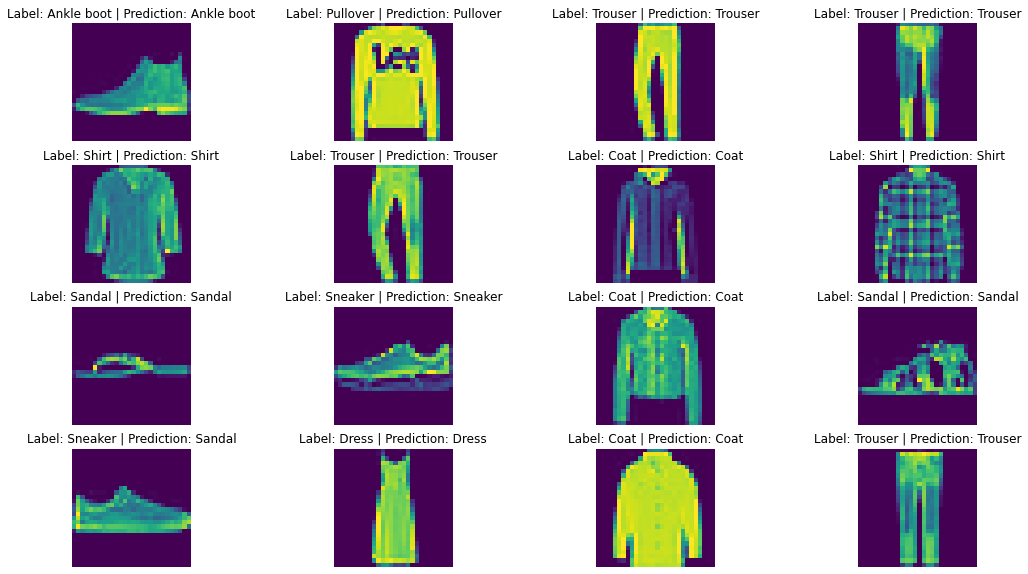

In [13]:
# Display examples with predictions
cols, rows = 4, 4
plt.subplots(figsize=(18, 10))

for i in range(rows*cols):
  ax = plt.subplot(rows, cols, i+1)
  ax.set_axis_off()
  ax.imshow(X_test[i])
  ax.set_title(f"Label: {class_names[np.argmax(y_test[i])]} | Prediction: {class_names[np.argmax(predictions[i])]}")

plt.show()

In [14]:
# Save model in JSON
filename = "mnist-fashion-classification-keras-cnn"

model_json = model.to_json()
with open(f"{filename}-model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights in HDF5
model.save_weights(f"{filename}-model.h5")

In [15]:
# Load JSON and create model
json_file = open(f"{filename}-model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into new model
loaded_model.load_weights(f"{filename}-model.h5")

In [16]:
# Evaluate loaded model on test data
opt = Adam()
loss = "categorical_crossentropy"
metrics = ["accuracy"]

loaded_model.compile(optimizer=opt, loss=loss, metrics=metrics)

# Evaluate model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

313/313 [==============================] - 1s 5ms/step - loss: 0.3890 - accuracy: 0.9284
Accuracy: 92.84
